In [1]:
from IPython.display import Image

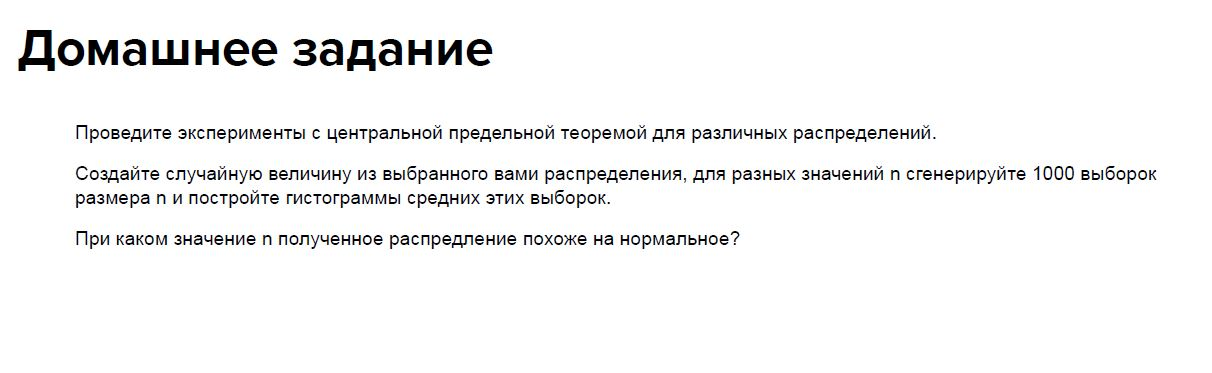

In [2]:
Image("C:\Мои занятия\Нетология\Математика для DS(18)\Лекция 9\hw.JPG")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
%matplotlib inline

In [4]:
# сгенеруем выборку объема 1000 из распределения
# рассмотривать экспоненциальное распределение случайно величины с lambda = 1
rv = sts.expon() 

sample = rv.rvs(size=1000)

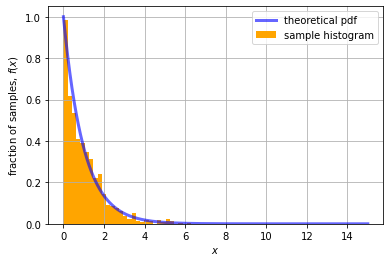

In [5]:
# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(0, 15, 1000)
pdf = rv.pdf(x)

# построим гистограмму выборки и наложим на нее теоретическую 
# оценку плотности вероятности экспоненциального распределения

plt.hist(sample, density=True, bins=30, label='sample histogram', color='orange')
plt.plot(x, pdf, 'b-', lw=3, alpha=0.6, label='theoretical pdf')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.show()

In [6]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = np.array([])
    for _ in range(1000):
        sample = rv.rvs(n)
        means = np.append(means, sample.mean())
    
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 1 # theoretical expectation
    sigma = (1./n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    label_1 = 'sample of ' + str(n) + ' histogram'
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, density=True, label=label_1)
    plt.legend()
    plt.ylabel('samples means')
    plt.xlabel('$\\bar{X}_n$')
    plt.title('n = %d' % n)
    plt.grid(True)
    plt.show()

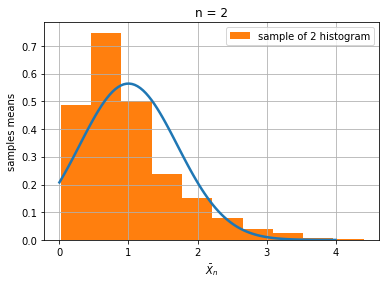

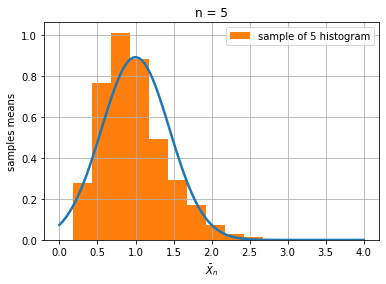

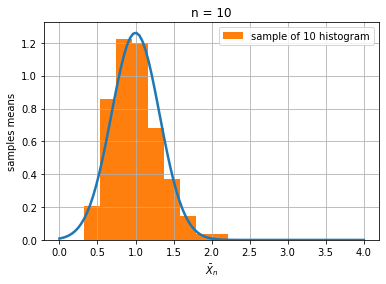

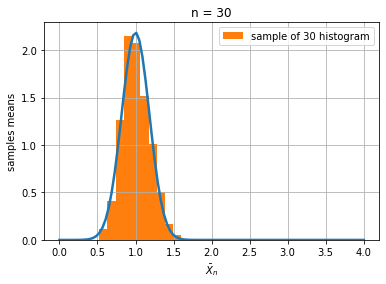

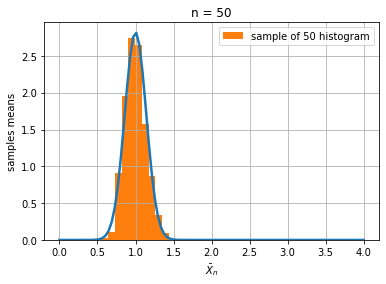

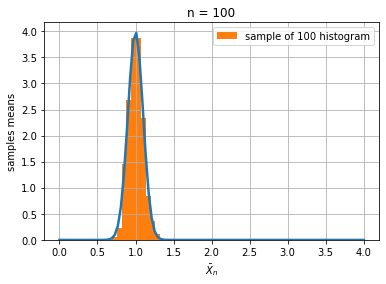

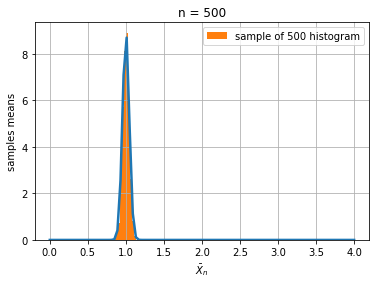

In [7]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [2, 5, 10, 30, 50, 100, 500]:
    generate_pdf(n)